We develop plotting capabilities in this notebook. To checkout ideas.

In [9]:
import numpy
import pandas
from matplotlib import pyplot
import seaborn

seaborn.set(
    style="darkgrid")

In [10]:
tips = seaborn\
    .load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


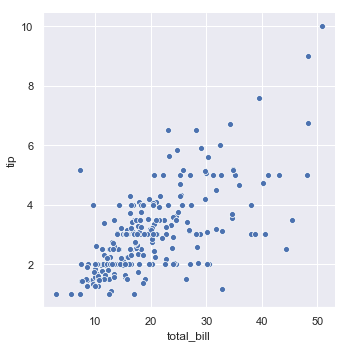

In [11]:
seaborn\
    .relplot(
        x="total_bill",
        y="tip",
        data=tips)

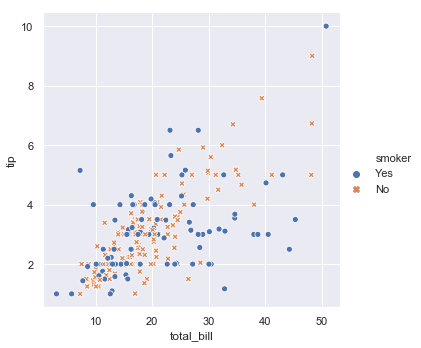

In [14]:
seaborn\
    .relplot(
        x="total_bill",
        y="tip",
        hue="smoker",
        style="smoker",
        data=tips)

Numeric variables as hue will be plotted with a sequential pallete.

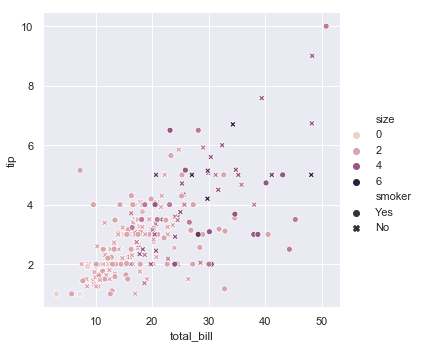

In [15]:
seaborn\
    .relplot(
        x="total_bill",
        y="tip",
        hue="size",
        style="smoker",
        data=tips)

Or seaborn can use size of the marker:

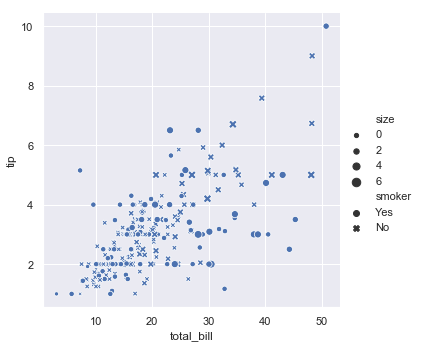

In [16]:
seaborn\
    .relplot(
        x="total_bill",
        y="tip",
        size="size",
        style="smoker",
        data=tips)

The range of the plotted variable is used to determine the marker size. You may customize this range:

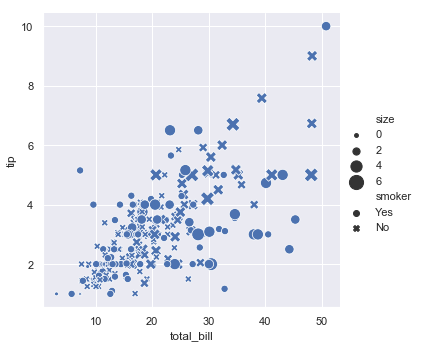

In [17]:
seaborn\
    .relplot(
        x="total_bill",
        y="tip",
        size="size", sizes=(15, 200),
        style="smoker",
        data=tips)

If provided raw data, seaborn will plot the mean, with a 95% confidence interval.

In [18]:
fmri = seaborn\
    .load_dataset(
        "fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


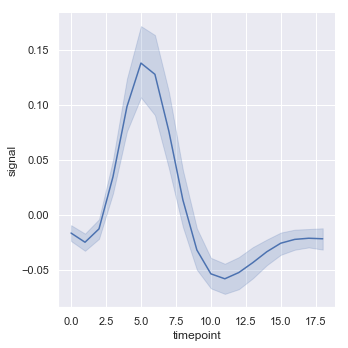

In [19]:
seaborn\
    .relplot(
        x="timepoint",
        y="signal",
        kind="line",
        data=fmri)

There are lots of defaults available to add semantic to your plot. 


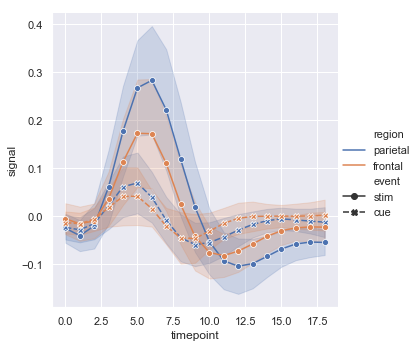

In [23]:
seaborn\
    .relplot(
        x="timepoint",
        y="signal",
        hue="region", 
        style="event",
        kind="line",
        ci="sd",
        markers=True,
        data=fmri)

Now one thing that we are stuck on. Barplots.

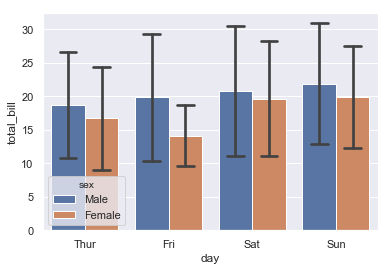

In [29]:
axes = seaborn\
    .barplot(
        x="day",
        y="total_bill",
        hue="sex",
        #order=["Dinner", "Lunch"],
        ci="sd",
        capsize=.2,
        data=tips)

To make barplots like above, we will need to have raw sample data, no need to compute a statistical summary before hand.

When there are more variables that the data can be subset on, use catplot to combine a barplot with a FacetGrid.

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


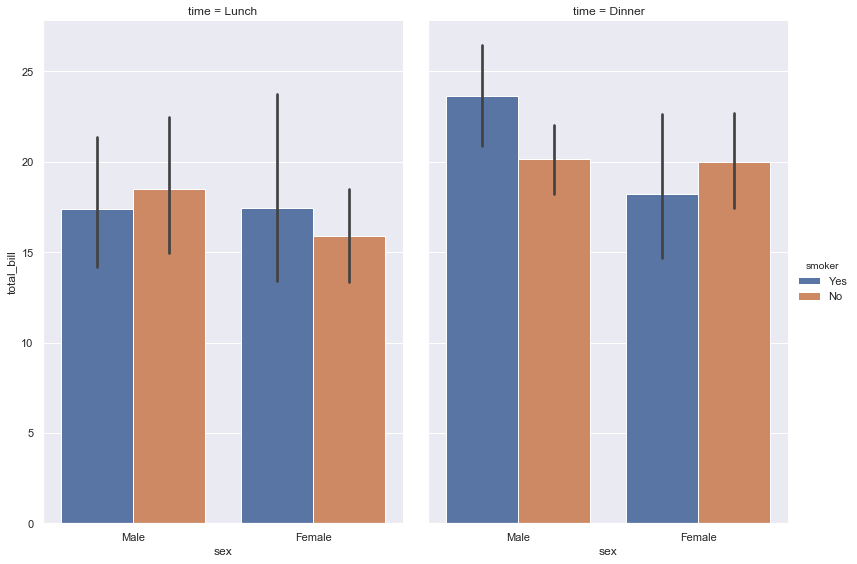

In [30]:
axes = seaborn\
    .catplot(
        x="sex",
        y="total_bill",
        hue="smoker",
        col="time", #column
        data=tips,
        kind="bar",
        height=8,
        aspect=.7)

Seaborne, and the plotting ideas in Seaborne,  will make plotting really straightforward.

In [31]:
flights_long = seaborn\
    .load_dataset(
        "flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [33]:
flights = flights_long\
    .pivot(
        "month",
        "year",
        "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


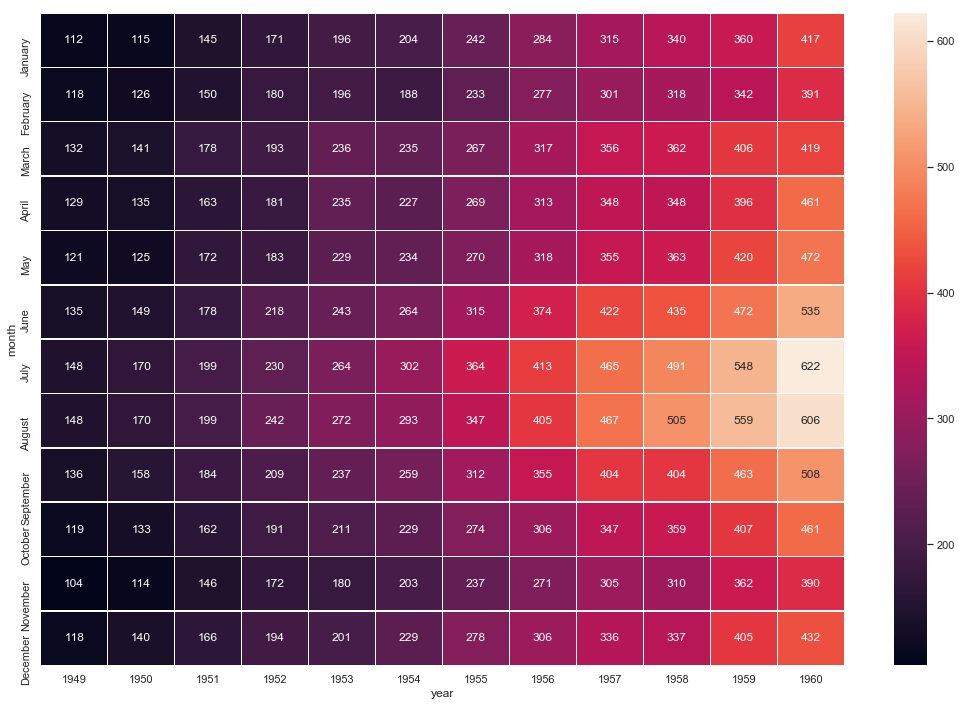

In [35]:
f, ax = pyplot\
    .subplots(
        figsize=(18,12))
seaborn\
    .heatmap(
        flights,
        annot=True,
        fmt="d",
        linewidths=.5,
        ax=ax)

Seems like Heatmaps are not that straightforward, but more so than raw matplotlib.